In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

seed = 42

## Obtener los datos del "Credit Approval Dataset"

In [2]:
ruta = "../data/Electricity.xlsx"
df = pd.read_excel(ruta)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
0,0.000044,3,0.063830,0.044374,0.316721,0.003467,0.422915,0.414912,1
1,0.000044,3,0.085106,0.041041,0.257959,0.003467,0.422915,0.414912,1
2,0.000044,3,0.106383,0.041161,0.214073,0.003467,0.422915,0.414912,1
3,0.000044,3,0.127660,0.041161,0.178816,0.003467,0.422915,0.414912,1
4,0.000044,3,0.148936,0.040951,0.151889,0.003467,0.422915,0.414912,1


In [3]:
df.shape
# 2400 vectores
# 9 características

(2400, 9)

In [ ]:
card_pos = len(df[df['class'] == 2])
card_neg = len(df[df['class'] == 1])

print(f'IR: = {np.round(card_neg / card_pos, 4)}')
# Apenas pasa como balanceado

IR: = 1.4742


## Ubicar valores nulos, repetidos e indiscernibles

In [7]:
# Sin valores nulos
df.isnull().sum()

feat_1    0
feat_2    0
feat_3    0
feat_4    0
feat_5    0
feat_6    0
feat_7    0
feat_8    0
class     0
dtype: int64

In [8]:
# Valores repetidos
df.duplicated().sum()

np.int64(0)

In [9]:
# Valores indiscernibles
X = df.drop('class', axis = 1)
Y = df['class']

df_copia = df.copy()

indiscernibles = df_copia.groupby(list(X.columns))['class'].nunique()
indiscernibles = indiscernibles[indiscernibles > 1]
len(indiscernibles)


0

## Limpieza de nulos, repetidos e indiscernibles  

In [10]:
# nulos
df = df.dropna()

# repetidos
df = df.drop_duplicates(keep = 'first')

# indiscernibles
mask = df.groupby(list(X.columns))['class'].transform('nunique')>1
df = df[~mask]

df.shape

(2400, 9)

In [11]:
df.shape
# 653 vectores
# 15 características
# Parece que estaba limpio

(2400, 9)

## Revolver datos porque vienen ordenados y me van a sesgar el modelo

In [12]:
df = df.sample(frac = 1)
df['class'].value_counts()
# 1 --> clase negativa
# 2 --> clase positiva

class
1    1430
2     970
Name: count, dtype: int64

In [13]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
2294,0.005088,6,0.680851,0.075357,0.394228,0.003467,0.422915,0.414912,2
1220,0.004956,3,0.148936,0.075207,0.223445,0.003467,0.422915,0.414912,1
1811,0.000752,5,0.446809,0.083103,0.542398,0.003467,0.422915,0.414912,2
2186,0.004823,7,0.936170,0.076828,0.455965,0.003467,0.422915,0.414912,2
2306,0.005133,7,0.319149,0.068362,0.231627,0.003467,0.422915,0.414912,2


## Reetiquetar las clases

In [14]:
# Etiqueta de clase numérica con un diccionario
# 0 --> clase negativa
# 1 --> clase positiva
df['class'] = df['class']-1
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,class
2294,0.005088,6,0.680851,0.075357,0.394228,0.003467,0.422915,0.414912,1
1220,0.004956,3,0.148936,0.075207,0.223445,0.003467,0.422915,0.414912,0
1811,0.000752,5,0.446809,0.083103,0.542398,0.003467,0.422915,0.414912,1
2186,0.004823,7,0.936170,0.076828,0.455965,0.003467,0.422915,0.414912,1
2306,0.005133,7,0.319149,0.068362,0.231627,0.003467,0.422915,0.414912,1


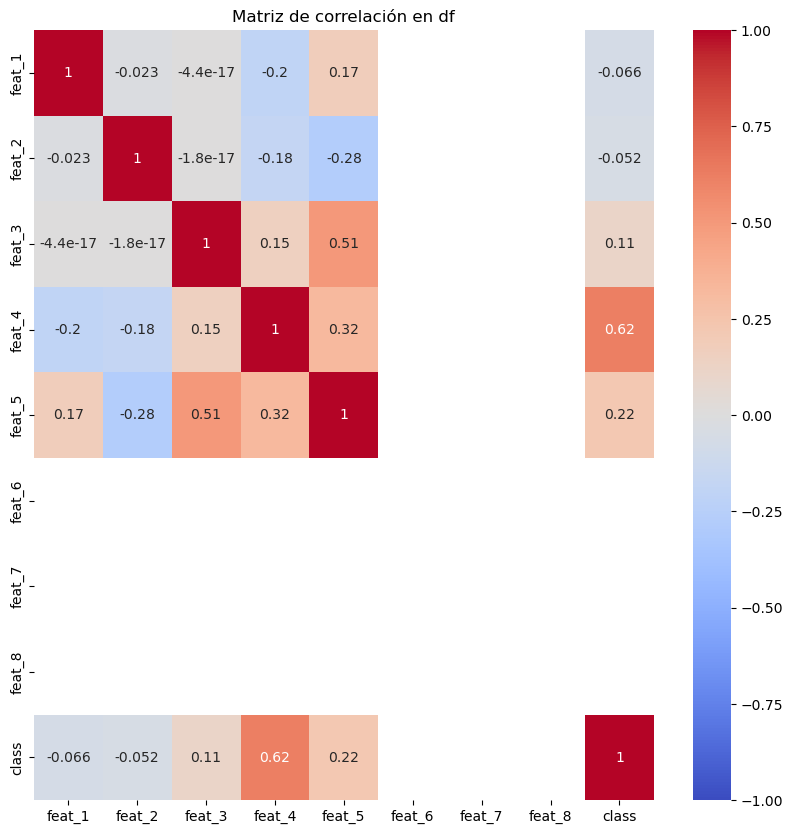

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación en df")
plt.show()
# Hay que quitarle las características 6, 7 y 8 porque son constantes.

In [16]:
col_const = [f'feat_{i}' for i in range(6, 9)]
df.drop(columns = col_const, inplace = True)
df.head()


,feat_1,feat_2,feat_3,feat_4,feat_5,class
2294,0.005088,6,0.680851,0.075357,0.394228,1
1220,0.004956,3,0.148936,0.075207,0.223445,0
1811,0.000752,5,0.446809,0.083103,0.542398,1
2186,0.004823,7,0.936170,0.076828,0.455965,1
2306,0.005133,7,0.319149,0.068362,0.231627,1


## Normalización de las características numericas


In [17]:
# Estandarizar para que no afecte a los algoritmos basados en distancias como el SVM o los KNN
scaler = MinMaxScaler()

numericos = [col for col in df.columns if col != 'class']

df_numericos_scaled = scaler.fit_transform(df[numericos])
df_numericos_scaled = pd.DataFrame(df_numericos_scaled, columns = numericos)
df_numericos_scaled.head()

,feat_1,feat_2,feat_3,feat_4,feat_5
0,0.966098,0.833333,0.680851,0.133967,0.434577
1,0.940816,0.333333,0.148936,0.133387,0.217193
2,0.135606,0.666667,0.446809,0.163919,0.623177
3,0.915342,1.000000,0.936170,0.139655,0.513160
4,0.974717,1.000000,0.319149,0.106919,0.227607


## Unir los numericos normalizados con la clase en un df final

In [18]:
df_final = pd.concat([df_numericos_scaled.reset_index(drop = True), 
                      df['class'].reset_index(drop = True)], axis = 1)
df_final.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,class
0,0.966098,0.833333,0.680851,0.133967,0.434577,1
1,0.940816,0.333333,0.148936,0.133387,0.217193,0
2,0.135606,0.666667,0.446809,0.163919,0.623177,1
3,0.915342,1.000000,0.936170,0.139655,0.513160,1
4,0.974717,1.000000,0.319149,0.106919,0.227607,1


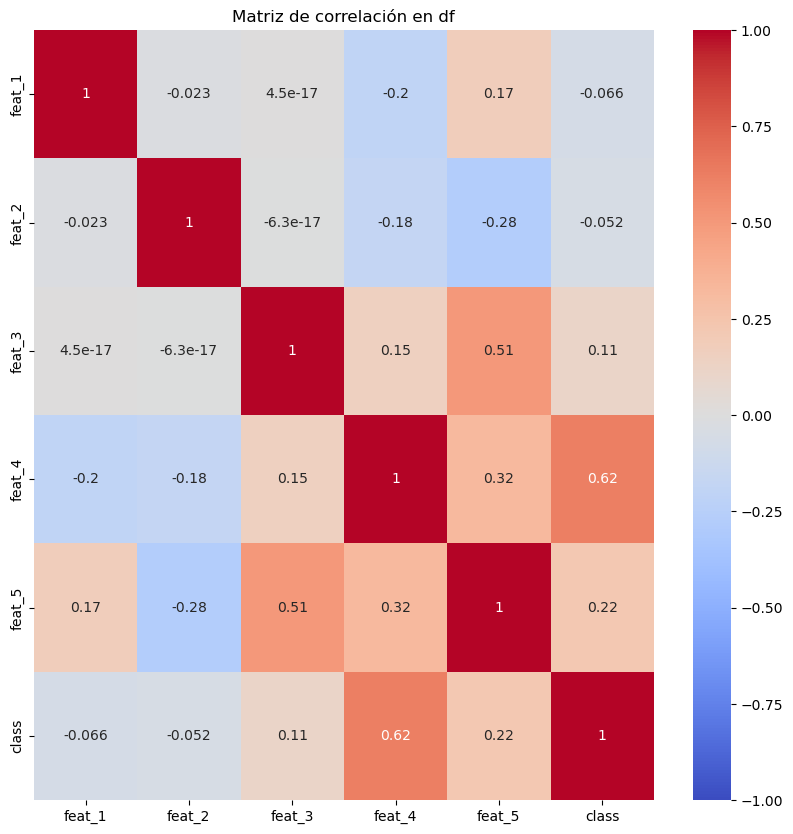

In [19]:
corr_matrix = df_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.title("Matriz de correlación en df")
plt.show()

## Guardar Dataset FInal

In [20]:
df_final.to_csv('../data/Electricity_limpio.csv', index = False)